In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [15]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    """Plots the decision surface of ``est`` on features ``x1`` and ``x2``. """
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))
    
    X_pred = np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx2.ravel()**2, xx1.ravel()*xx2.ravel(), xx1.ravel()**3, xx2.ravel()**2]
    
    if hasattr(est, 'predict_proba'):  
        pred = est.predict_proba(X_pred)[:, 1]
    else:
        pred = est.predict(X_pred)
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    plt.show()

In [16]:
df = pd.read_csv('testsCom.csv')
X, y = df[["test1", "test2", "test1test1", "test2test2", "test1test2", "test1test1test1", "test2test2test2"]], df['passed']

In [17]:
print(X.shape, y.shape)

(118, 7) (118,)


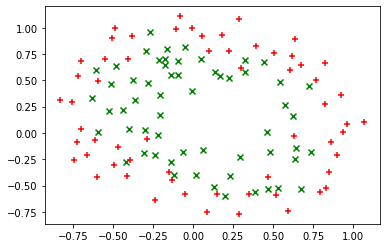

In [18]:
plot_data(X, y)

In [19]:
clf = LogisticRegression()
#clf = LogisticRegression(solver='lbfgs')
#clf = LogisticRegression(solver='lbfgs', max_iter=100000, tol=1e-10)
clf = clf.fit(X, y)

In [20]:
y_pred = clf.predict(X)

In [21]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
accuracy_score(y, y_pred)

0.8050847457627118

In [23]:
X_test = np.array([[60, 70], [50, 50]])

In [24]:
y_test = clf.predict(X_test)

c:\Programs\MyPrograms\Python\ML\3K2SML\Homeworks\3\venv_3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LogisticRegression is expecting 7 features as input.

In [ ]:
y_test

array([0, 0], dtype=int64)

In [ ]:
X_test

array([[60, 70],
       [50, 50]])

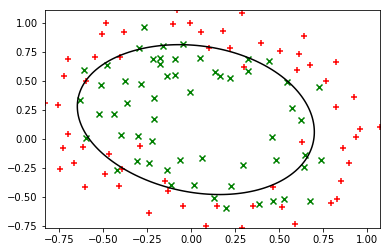

In [ ]:
plot_data(X, y)
plot_surface(clf, X.iloc[:, 0], X.iloc[:, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

In [ ]:
clf = LogisticRegression(solver='lbfgs', max_iter=100000, tol=1e-10)
clf = clf.fit(X_train, y_train)

In [ ]:
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8875

In [ ]:
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9

In [ ]:
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


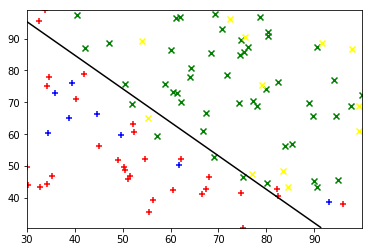

In [ ]:
plot_data(X_train, y_train)
plot_data(X_test, y_test, True)
plot_surface(clf, X.iloc[:, 0], X.iloc[:, 1])